<a href="https://colab.research.google.com/github/JoshuaJohnPaul/Deeplearing/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
fashion_dt=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_dt

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_trainsp,y_trainsp),(x_testsp,y_testsp)=fashion_dt
x_trainsp.shape

(60000, 28, 28)

In [ ]:
it_n=["Tshirt/Top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneakers","Bag","Ankle Boot"]

In [ ]:
it_n

['Tshirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneakers',
 'Bag',
 'Ankle Boot']

In [ ]:
x_trainsp=x_trainsp.reshape((60000,28,28,1))
x_testsp=x_testsp.reshape((10000,28,28,1))
x_trainsp.shape

(60000, 28, 28, 1)

In [ ]:
x_trainnom=x_trainsp/255
x_testnom=x_testsp/255


In [ ]:
x_validate,x_train=x_trainnom[:5000],x_trainnom[5000:]
y_validate,y_train=y_trainsp[:5000],y_trainsp[5000:]
x_test=x_testnom

In [ ]:
x_testnom

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
tf.random.set_seed(42)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
mf=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_data=(x_validate,y_validate))

Epoch 1/5
860/860 [==============================] - 39s 45ms/step - loss: 0.8886 - accuracy: 0.6907 - val_loss: 0.7451 - val_accuracy: 0.7254
Epoch 2/5
860/860 [==============================] - 40s 47ms/step - loss: 0.5403 - accuracy: 0.8025 - val_loss: 0.4839 - val_accuracy: 0.8194
Epoch 3/5
860/860 [==============================] - 36s 42ms/step - loss: 0.4804 - accuracy: 0.8260 - val_loss: 0.8924 - val_accuracy: 0.6920
Epoch 4/5
860/860 [==============================] - 36s 42ms/step - loss: 0.4430 - accuracy: 0.8415 - val_loss: 0.4111 - val_accuracy: 0.8576
Epoch 5/5
860/860 [==============================] - 38s 44ms/step - loss: 0.4190 - accuracy: 0.8487 - val_loss: 0.4276 - val_accuracy: 0.8488


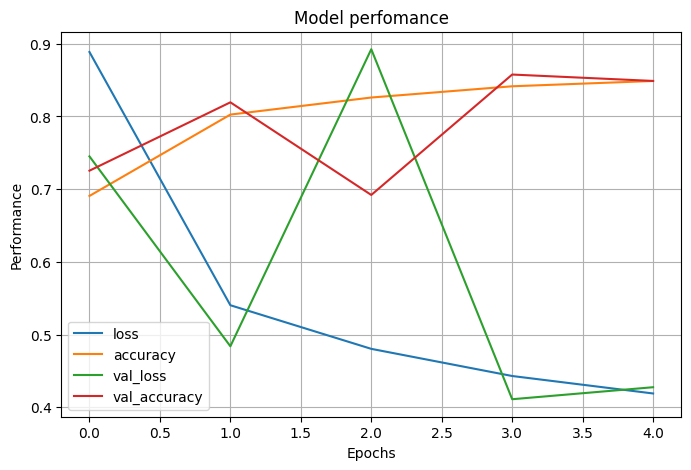

In [ ]:
pd.DataFrame(mf.history).plot(figsize=(8,5))
plt.title("Model perfomance")
plt.xlabel("Epochs")
plt.ylabel("Performance")
plt.grid(True)
plt.show()

313/313 [==============================] - 3s 8ms/step - loss: 0.4610 - accuracy: 0.8356
Score: [0.46104589104652405, 0.8356000185012817]
313/313 [==============================] - 3s 9ms/step
y_prdicrtion: [7 2 1 ... 8 1 5]
Pred_cls: [7 2 1]
Pred_clsn labels: ['Sneakers' 'Pullover' 'Trouser']


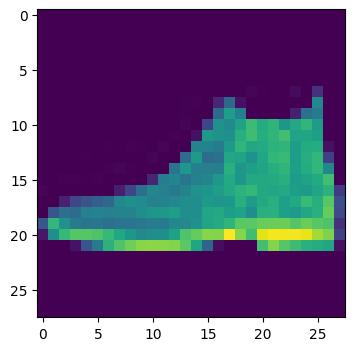

CM: [[745   2   7 133   4   1  89   1  18   0]
 [  0 951   0  41   4   0   2   0   2   0]
 [ 10   0 666  26 167   1 117   0  13   0]
 [  9   8   2 938  11   1  27   0   4   0]
 [  0   2  49  73 772   1  96   0   7   0]
 [  0   0   0   1   0 946   0  46   1   6]
 [128   2  77 108  85   0 571   0  29   0]
 [  0   0   0   0   0  28   0 969   0   3]
 [  1   1   5  11   1   3  10   5 963   0]
 [  0   0   0   0   0  34   0 130   1 835]]
acc: 0.8356


In [ ]:
sc=model.evaluate(x_test,y_testsp)
print("Score:",sc)
y_pred=np.argmax(model.predict(x_test),axis=1)
print("y_prdicrtion:",y_pred)
print("Pred_cls:",y_pred[:3])
print("Pred_clsn labels:",np.array(it_n)[y_pred[:3]])
plt.figure(figsize=(6,4))
plt.imshow(x_test[0].reshape((28,28)))
plt.show()
print("CM:",confusion_matrix(y_testsp,y_pred))
print("acc:",accuracy_score(y_testsp,y_pred))